I try to implement resuable and robust functions.

In [45]:
%matplotlib inline

import numpy as np
from urllib import request


def download(url):
    
    response = request.urlopen(url)
    data = response.read().decode("utf-8")
    response.close()

    lines = data.split("\n")
  
    t_data = []
    y_data = []

    for line in lines:
        if "time" in line:
            continue
        if line.strip():   # empty string is considered as False !
            t, y = line.split(" ")
            t_data.append(float(t))
            y_data.append(float(y))

    t_data = np.array(t_data)
    y_data = np.array(y_data)
    return t_data, y_data

[ 81.68035132   0.94410949   0.11008035]


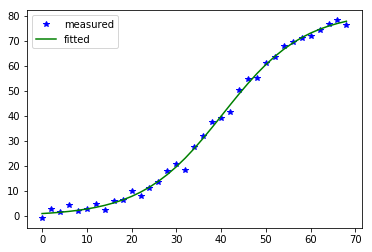

In [58]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as pyplot


def logistic(t, K, P0, r):
    """
    argument t:  vector of time values
    argument K:  first parameter to fit
    argument P0:  second parameter to fit
    argument r:  third parameter to fit
        
    returns:  vector of y values corresponding to given parameters
    """
   
    # enable next line to see how the fitting algorithm iteratively
    # improves estimates for the parameters:
    
    # print("K={:10.3e}  P0={:10.3e}  r={:10.3e}".format(K, P0, r))
    
    ert = np.exp(r * t)
    return K * P0 * ert / (K + P0 * (ert - 1))


def fit_logistic(t_data, y_data, K_start=None, P0_start=None, r_start=None):
    
    assert len(t_data) > 0
    assert len(t_data) == len(y_data)
    
    # good starting values are important, if the user of the function has no
    # idea about the expected parameters, we try to come up with an guess.
    
    if K_start is None:
        K_start = max(y_data)   # estimate capacity
    if P0_start is None:
        P0_start = 0            # guessing here, don't know how to come up with an estimate
    if r_start is None:
        r_start = 1             # we assume as default that growth rate is not zero

    p_start = np.array([K_start, P0_start, r_start])

    # I use __ to indicate an unused variable:
    parameters, __ = scipy.optimize.curve_fit(logistic, t_data, y_data, p_start)
    return parameters


def plot_result(t_data, y_data, parameters):
    """we could also use separate arguments for K, P0, r. But so we have less function
    arguments, and we group to a "meaningful entity".
    """
    K, P0, r = parameters
    pyplot.plot(t_data, y_data, "b*", label="measured")
    pyplot.plot(t_data, logistic(t_data, K, P0, r), "green", label="fitted")
    pyplot.legend(loc=2)  # upper left corner

    
t_data, y_data = download("https://siscourses.ethz.ch/python_challenges/logistic_data.txt")
parameters = fit_logistic(t_data, y_data)
print(parameters)
plot_result(t_data, y_data, parameters)
pyplot.show()

The plot for the other data set looks broken:

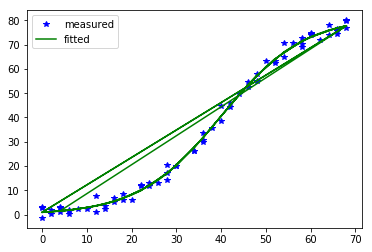

[ 81.34288669   0.98841434   0.10977646]


In [57]:
t_data, y_data = download("https://siscourses.ethz.ch/python_challenges/logistic_data_multi.txt")
parameters = fit_logistic(t_data, y_data)
plot_result(t_data, y_data, parameters)
pyplot.show()
print(parameters)

`plot` connects two consecutive pairs by a line in the given color. So what you see is that `t_data` is not sorted:

In [61]:
print(np.all(t_data == np.sort(t_data)))

True


To sort two vectors at the same time there are two solutions:

`np.argsort` does not sort the given data, but computes the permutation which would sort it:

In [62]:
permutation = np.argsort(t_data)
print(permutation)
t_data = t_data[permutation]
y_data = y_data[permutation]
print(np.all(t_data == np.sort(t_data)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
True


We also can use tuples.

To compare two tuples, the first element dominates, if first elements are the same, the second element dominates, and so on

In [50]:
print((0, 1, 2) < (1, 2, 3))

True


In [51]:
print((0, 1, 2) < (0, 2, 3))

True


So the next lines will also sort `t_data` and `y_data` according to the order of `t_data`:

In [63]:
data = zip(t_data , y_data)
data = sorted(data)
t_data = np.array([t for (t, y) in data])
y_data = np.array([y for (t, y) in data])
print(np.all(t_data == np.sort(t_data)))

True


Now the plot looks fine:

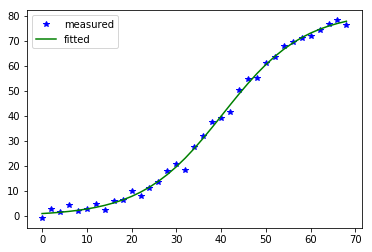

In [64]:
plot_result(t_data, y_data, parameters)
pyplot.show()

In [44]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND